In [1]:
#LOADING DATASET

from keras.utils import *
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder


from numpy import array
from numpy import argmax
import pandas as pd

#MOOI GRAFIEKJE 

import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()


filepath_dict = {'conll':  'data/somefile.txt',
                'devdata': 'data/testsetgoede.txt'}



df_list = []
for source, filepath in filepath_dict.items():
    
    df = pd.read_csv(filepath, names=['sentence','pos','label'], sep=' ')
    le = preprocessing.LabelEncoder()
    
    le.fit(df['label'])
    le.transform(df['label']) 
    df['label']= le.transform(df['label']) 
    df['source'] = source 




    df_list.append(df)



label1 = (df['label'])


worderino =(df['sentence'])


df = pd.concat(df_list)
print(df.iloc[8])
print(df.shape)


Using TensorFlow backend.


sentence     Gent
pos             N
label           0
source      conll
Name: 8, dtype: object
(65362, 4)


In [2]:
#VALUES IN TRAINING AND TEST DATA

from sklearn.model_selection import train_test_split

df_conll = df[df['source'] == 'conll']
sentences = df_conll['sentence'].values
y = df_conll['label'].values

df_devdata= df[df['source']== 'devdata']
devsentences= df_devdata['sentence'].values
ydev = df_devdata['label'].values
print(sentences)
print(y)
print(devsentences)
print(ydev)

sentences_train = sentences
sentences_test = devsentences
y_train = y
y_test = ydev


['Floralux' 'Vlaamse' 'BPA' ... 'Sauvignon' 'Blanc' 'California']
[2 1 1 ... 1 1 0]
['Italië' 'Spanje' 'Engeland' ... 'AD' 'Alain' 'Devos']
[0 0 0 ... 3 3 3]


In [3]:
sentences_train

array(['Floralux', 'Vlaamse', 'BPA', ..., 'Sauvignon', 'Blanc',
       'California'], dtype=object)

In [4]:
sentences_train.shape

(19298,)

In [5]:

from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=50000)
tokenizer.fit_on_texts(sentences_train)

X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)

vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index

print(sentences_train[0])
print(X_train[0])



Floralux
[150]


In [6]:
######################################## PRETRAINED WORD EMBEDDINGS

In [7]:
len(tokenizer.word_index)

6324

In [8]:
y_train.shape

(19298,)

In [9]:
import numpy as np

idx2word = {}
def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    with open(filepath) as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(
                    vector, dtype=np.float32)[:embedding_dim]

    return embedding_matrix

In [10]:
embedding_dim = 320

embedding_matrix = create_embedding_matrix(
    '/Users/remywang/Documents/scriptie/Data/160/cow-big.txt',
    tokenizer.word_index, embedding_dim)

print(embedding_matrix)

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-0.041264    0.026875    0.021691   ...  0.05353     0.032076
   0.005189  ]
 [-0.033177   -0.007429    0.020558   ... -0.082706    0.026202
  -0.028191  ]
 ...
 [-0.01681     0.018299    0.094619   ...  0.13356701  0.052305
   0.15691601]
 [-0.006296    0.041042    0.078731   ...  0.10197    -0.030523
   0.037903  ]
 [ 0.052532   -0.008701   -0.056779   ... -0.091466   -0.087268
   0.035066  ]]


In [11]:
X_train_embedding = []
y_train_good_emb = []
for index, item in enumerate(X_train):
    if len(item) == 0:
        continue
        
    word_index = item[0]
    
    emb_matrix = embedding_matrix[[6324], :]
    if np.sum(emb_matrix) != 0:
        X_train_embedding.append(emb_matrix)
        y_train_good_emb.append(y_train[index])
print(emb_matrix)        

[[ 0.052532   -0.008701   -0.056779    0.012533   -0.031793    0.014476
  -0.023073    0.075675    0.033923    0.057863    0.023847    0.08427
  -0.087561   -0.095555   -0.023629    0.041518    0.009125    0.044356
  -0.077004   -0.018152   -0.057262    0.072891   -0.084966    0.062788
  -0.028944    0.032155   -0.025435   -0.052086    0.008951   -0.050909
   0.027026   -0.062986    0.022147   -0.0552      0.029073   -0.017197
  -0.001025   -0.051815    0.086988   -0.079486    0.074878    0.094759
  -0.055517    0.022512   -0.055654   -0.011336   -0.018488   -0.081529
   0.017047   -0.083654    0.010985    0.055942    0.005746   -0.05936
  -0.11189    -0.030762    0.024053   -0.018648   -0.012636   -0.058367
   0.007235   -0.082845   -0.000838   -0.008352   -0.064313   -0.001675
   0.079348   -0.051943    0.025327    0.047932   -0.051407   -0.003333
  -0.00847     0.062344    0.00852     0.022193   -0.056906   -0.004115
  -0.049818   -0.022458   -0.063711    0.023677   -0.032528    0.1

In [12]:
y_train_good_emb = np.array(y_train_good_emb)
X_train_embedding = np.array(X_train_embedding)

In [13]:
X_train_embedding.shape

(19262, 1, 320)

In [14]:
nonzero_elements = np.count_nonzero(np.count_nonzero(embedding_matrix, axis=1))
nonzero_elements / vocab_size


0.9335968379446641

In [15]:
vocab_size

6325

In [16]:
embedding_dim

320

In [17]:
X_train_embedding = []
y_train_good_emb = []
for index, item in enumerate(X_train):
    if len(item) == 0:
        continue
        
    word_index = item[0]
    
    emb_matrix = embedding_matrix[word_index, :]
    if np.sum(emb_matrix) != 0:
        X_train_embedding.append(emb_matrix)
        y_train_good_emb.append(y_train[index])
        
y_train_good_emb = np.array(y_train_good_emb)
X_train_embedding = np.array(X_train_embedding)

In [18]:
X_test_emb = []
y_test_good_emb = []
xgoedewoord = []
for index, item in enumerate(X_test):
    if len(item) == 0:
        continue
        
    word_index = item[0]
    
    emb_matrix = embedding_matrix[word_index, :]
    if np.sum(emb_matrix) != 0:
        X_test_emb.append(emb_matrix)
        y_test_good_emb.append(y_test[index])
        xgoedewoord.append(worderino[index])
        
y_test_good_emb = np.array(y_test_good_emb)
X_test_emb = np.array(X_test_emb)
xgoedewoord = np.array(xgoedewoord)

In [19]:
# baseline
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report

clf = LogisticRegression().fit(X_train_embedding, y_train_good_emb)

predictions = clf.predict(X_test_emb)

print(classification_report(y_test_good_emb, predictions))

/Users/remywang/Library/Python/3.6/lib/python/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/remywang/Library/Python/3.6/lib/python/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


              precision    recall  f1-score   support

           0       0.78      0.93      0.85      4488
           1       0.79      0.73      0.76      8392
           2       0.76      0.73      0.74      7344
           3       0.89      0.91      0.90      8680

   micro avg       0.81      0.81      0.81     28904
   macro avg       0.81      0.82      0.81     28904
weighted avg       0.81      0.81      0.81     28904



In [20]:
from keras.models import Sequential
from keras import layers

model = Sequential()

model.add(layers.Dense(32, input_shape=(320, )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))
model.compile(optimizer='Nadam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

embedding_dim = 320



Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                10272     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 260       
Total params: 12,644
Trainable params: 12,644
Non-trainable params: 0
_________________________________________________________________


Instructions for updating:
Use tf.cast instead.
Training Accuracy: 0.9147
Testing Accuracy:  0.8317


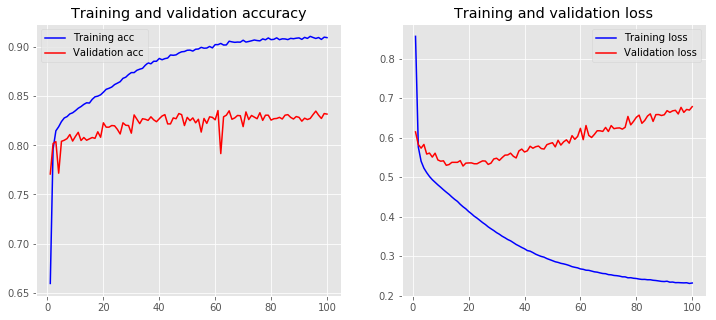

In [21]:
history = model.fit(X_train_embedding, y_train_good_emb,
                    epochs=100,
                    batch_size=256,
                    verbose=False,
                    validation_data=(X_test_emb, y_test_good_emb))
loss, accuracy = model.evaluate(X_train_embedding, y_train_good_emb, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test_emb, y_test_good_emb, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [37]:
predictions = np.argmax(model.predict(X_test_emb), axis=1)
print(predictions)

[0 0 0 ... 3 3 3]


In [41]:
print(classification_report(y_test_good_emb, predictions))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87      4488
           1       0.83      0.74      0.78      8392
           2       0.76      0.75      0.76      7344
           3       0.90      0.93      0.91      8680

   micro avg       0.83      0.83      0.83     28904
   macro avg       0.83      0.84      0.83     28904
weighted avg       0.83      0.83      0.83     28904



In [24]:
for index, i in enumerate(predictions):
    print("prediction: {}, actual: {},  {}  ".format(i, y_test_good_emb[index],xgoedewoord[index]))

prediction: 0, actual: 0,  Italië  
prediction: 0, actual: 0,  Spanje  
prediction: 0, actual: 0,  Engeland  
prediction: 3, actual: 3,  Der  
prediction: 0, actual: 0,  Duitsland  
prediction: 0, actual: 0,  Zürich  
prediction: 1, actual: 2,  Uefa  
prediction: 2, actual: 2,  Fifa  
prediction: 2, actual: 2,  EU  
prediction: 1, actual: 1,  Belgische  
prediction: 2, actual: 2,  De  
prediction: 2, actual: 2,  Morgen  
prediction: 1, actual: 1,  Europese  
prediction: 1, actual: 1,  Europese  
prediction: 1, actual: 2,  Europese  
prediction: 2, actual: 2,  Commissie  
prediction: 2, actual: 2,  Reuters  
prediction: 1, actual: 2,  Uefa  
prediction: 2, actual: 2,  Fifa  
prediction: 1, actual: 1,  Sport  
prediction: 2, actual: 1,  Fifa-voorzitter  
prediction: 0, actual: 0,  Zürich  
prediction: 3, actual: 3,  Franz  
prediction: 3, actual: 3,  Van  
prediction: 3, actual: 3,  Roost  
prediction: 1, actual: 1,  Amerikaanse  
prediction: 3, actual: 3,  Lindsay  
prediction: 3, actua

prediction: 3, actual: 3,  Yves  
prediction: 3, actual: 3,  Vanderhaeghe  
prediction: 1, actual: 1,  Belgische  
prediction: 0, actual: 0,  Bulgarije  
prediction: 0, actual: 0,  België  
prediction: 0, actual: 0,  Brussel  
prediction: 1, actual: 1,  EK  
prediction: 1, actual: 1,  Algemeen  
prediction: 3, actual: 3,  Maarten  
prediction: 3, actual: 3,  Rabaey  
prediction: 3, actual: 3,  MR  
prediction: 2, actual: 2,  De  
prediction: 2, actual: 2,  Morgen  
prediction: 1, actual: 1,  Britse  
prediction: 1, actual: 1,  the  
prediction: 1, actual: 1,  Britse  
prediction: 2, actual: 2,  Handel  
prediction: 1, actual: 2,  en  
prediction: 0, actual: 0,  Brussel  
prediction: 1, actual: 1,  Buitenland  
prediction: 3, actual: 3,  Lode  
prediction: 3, actual: 3,  Delputte  
prediction: 1, actual: 1,  Spaanse  
prediction: 2, actual: 2,  De  
prediction: 2, actual: 2,  Morgen  
prediction: 0, actual: 0,  Baskenland  
prediction: 0, actual: 0,  Noord-Ierland  
prediction: 3, actua

prediction: 0, actual: 0,  Spa  
prediction: 3, actual: 3,  Van  
prediction: 3, actual: 3,  Bondt  
prediction: 3, actual: 3,  Leoni  
prediction: 0, actual: 0,  Ita  
prediction: 3, actual: 3,  Belli  
prediction: 0, actual: 0,  Ita  
prediction: 3, actual: 3,  Olano  
prediction: 0, actual: 0,  Spa  
prediction: 1, actual: 1,  Italiaanse  
prediction: 3, actual: 3,  Mario  
prediction: 1, actual: 1,  Spanjaard  
prediction: 3, actual: 3,  Alex  
prediction: 3, actual: 3,  Zülle  
prediction: 2, actual: 1,  Mapei-kopman  
prediction: 3, actual: 3,  Pavel  
prediction: 3, actual: 3,  Tonkov  
prediction: 3, actual: 3,  Odriozola  
prediction: 0, actual: 0,  Spa  
prediction: 0, actual: 0,  Ita  
prediction: 3, actual: 3,  Zülle  
prediction: 0, actual: 0,  Ita  
prediction: 3, actual: 3,  Belli  
prediction: 0, actual: 0,  Ita  
prediction: 3, actual: 3,  Ullrich  
prediction: 3, actual: 3,  Olano  
prediction: 0, actual: 0,  Spa  
prediction: 0, actual: 3,  Francisco  
prediction: 3,

prediction: 1, actual: 1,  Europese  
prediction: 3, actual: 3,  Dirk  
prediction: 2, actual: 3,  De  
prediction: 3, actual: 3,  Wilde  
prediction: 2, actual: 1,  PS-ministers  
prediction: 2, actual: 1,  PS-instemming  
prediction: 2, actual: 2,  PS  
prediction: 0, actual: 0,  Bergen  
prediction: 1, actual: 1,  Franstalige  
prediction: 3, actual: 3,  Di  
prediction: 2, actual: 1,  PS-voorzitter  
prediction: 3, actual: 3,  Di  
prediction: 3, actual: 3,  Di  
prediction: 3, actual: 3,  Di  
prediction: 3, actual: 3,  Di  
prediction: 1, actual: 1,  Vlamingen  
prediction: 3, actual: 3,  Di  
prediction: 1, actual: 1,  Franstaligen  
prediction: 1, actual: 1,  Franstaligen  
prediction: 1, actual: 1,  Franstaligen  
prediction: 0, actual: 0,  Vlaanderen  
prediction: 2, actual: 1,  PS-voorzitter  
prediction: 3, actual: 3,  Di  
prediction: 2, actual: 2,  Financiën  
prediction: 3, actual: 3,  Didier  
prediction: 3, actual: 3,  Reynders  
prediction: 2, actual: 2,  PRL  
predic

prediction: 1, actual: 1,  Financiële  
prediction: 2, actual: 1,  Morgen  
prediction: 0, actual: 0,  Frankfurt  
prediction: 0, actual: 0,  Frankrijk  
prediction: 3, actual: 3,  Geert  
prediction: 0, actual: 0,  Frankfurt  
prediction: 3, actual: 3,  Johan  
prediction: 3, actual: 3,  Corthouts  
prediction: 2, actual: 2,  Bloomberg  
prediction: 3, actual: 3,  Gustav-Adolf  
prediction: 3, actual: 3,  Horn  
prediction: 2, actual: 2,  Instituut  
prediction: 0, actual: 0,  Duitsland  
prediction: 1, actual: 1,  Europese  
prediction: 1, actual: 2,  Europese  
prediction: 2, actual: 2,  Bank  
prediction: 3, actual: 3,  Catherine  
prediction: 3, actual: 3,  Vuylsteke  
prediction: 2, actual: 2,  De  
prediction: 2, actual: 2,  Morgen  
prediction: 0, actual: 3,  San  
prediction: 2, actual: 2,  Nationale  
prediction: 0, actual: 3,  San  
prediction: 0, actual: 3,  San  
prediction: 1, actual: 1,  Thaise  
prediction: 1, actual: 1,  Buitenland  
prediction: 1, actual: 1,  Thaise  

prediction: 2, actual: 2,  CVP  
prediction: 3, actual: 3,  Jean-Marie  
prediction: 2, actual: 2,  VLD  
prediction: 3, actual: 3,  Johan  
prediction: 2, actual: 2,  SP  
prediction: 0, actual: 0,  Oostende  
prediction: 0, actual: 0,  Vlaanderen  
prediction: 3, actual: 3,  Felice  
prediction: 2, actual: 2,  VTM  
prediction: 1, actual: 3,  Lisa  
prediction: 3, actual: 3,  Sabine  
prediction: 2, actual: 1,  De  
prediction: 3, actual: 1,  Mol  
prediction: 2, actual: 2,  Canvas  
prediction: 1, actual: 1,  Nederlandse  
prediction: 0, actual: 0,  Knokke  
prediction: 3, actual: 3,  Leopold  
prediction: 3, actual: 3,  Lippens  
prediction: 2, actual: 2,  Canvas  
prediction: 1, actual: 1,  Waalse  
prediction: 2, actual: 2,  De  
prediction: 2, actual: 2,  Morgen  
prediction: 2, actual: 2,  KBC  
prediction: 0, actual: 0,  VS  
prediction: 2, actual: 2,  Glaverbel  
prediction: 2, actual: 2,  Roularta  
prediction: 2, actual: 1,  De  
prediction: 1, actual: 1,  Financiële  
pred

prediction: 2, actual: 2,  Blok  
prediction: 2, actual: 2,  Vlaams  
prediction: 2, actual: 2,  Blok  
prediction: 1, actual: 1,  Nederlands  
prediction: 2, actual: 2,  De  
prediction: 2, actual: 2,  Vlaams  
prediction: 2, actual: 2,  Blok  
prediction: 1, actual: 1,  Televisie  
prediction: 0, actual: 1,  Vietnam-veteraan  
prediction: 1, actual: 1,  Amerikaanse  
prediction: 1, actual: 1,  FIRST  
prediction: 2, actual: 2,  De  
prediction: 2, actual: 2,  Morgen  
prediction: 1, actual: 1,  Rocky-reeks  
prediction: 1, actual: 1,  Amerikaanse  
prediction: 3, actual: 3,  Richard  
prediction: 3, actual: 3,  Brian  
prediction: 3, actual: 3,  David  
prediction: 1, actual: 1,  Britse  
prediction: 3, actual: 3,  Mike  
prediction: 3, actual: 3,  Leigh  
prediction: 3, actual: 3,  Mark  
prediction: 3, actual: 3,  Kate  
prediction: 1, actual: 2,  La  
prediction: 2, actual: 2,  Deux  
prediction: 2, actual: 2,  De  
prediction: 2, actual: 2,  Morgen  
prediction: 3, actual: 3,  Cl

prediction: 0, actual: 0,  Atlanta  
prediction: 0, actual: 0,  Atlanta  
prediction: 1, actual: 1,  Sport  
prediction: 0, actual: 0,  Sydney  
prediction: 2, actual: 2,  De  
prediction: 2, actual: 2,  Morgen  
prediction: 1, actual: 1,  Spelen  
prediction: 0, actual: 0,  Sydney  
prediction: 3, actual: 3,  Pozzi  
prediction: 0, actual: 0,  Ita  
prediction: 3, actual: 3,  Christian  
prediction: 3, actual: 3,  Ruud  
prediction: 0, actual: 0,  Noo  
prediction: 3, actual: 3,  Schalken  
prediction: 0, actual: 0,  Ned  
prediction: 3, actual: 3,  Lars  
prediction: 0, actual: 0,  Dui  
prediction: 3, actual: 3,  Safin  
prediction: 0, actual: 0,  Rus  
prediction: 3, actual: 3,  Thierry  
prediction: 3, actual: 3,  Guardiola  
prediction: 0, actual: 0,  Fra  
prediction: 3, actual: 3,  Koubek  
prediction: 0, actual: 0,  Oos  
prediction: 3, actual: 3,  Juan  
prediction: 3, actual: 3,  Ignacio  
prediction: 3, actual: 3,  Chela  
prediction: 0, actual: 0,  Arg  
prediction: 3, act

prediction: 1, actual: 1,  Roemeense  
prediction: 1, actual: 1,  Roemeense  
prediction: 1, actual: 1,  Sport  
prediction: 3, actual: 3,  Armstrong  
prediction: 1, actual: 1,  Olympische  
prediction: 1, actual: 1,  Spelen  
prediction: 3, actual: 3,  Bruyneel  
prediction: 1, actual: 1,  Lierse-Bordeaux  
prediction: 1, actual: 1,  Tour-winnaar  
prediction: 3, actual: 3,  Armstrong  
prediction: 3, actual: 1,  Roland  
prediction: 1, actual: 1,  Garros  
prediction: 3, actual: 3,  Davenport  
prediction: 1, actual: 1,  Amerikaanse  
prediction: 3, actual: 3,  Dominique  
prediction: 3, actual: 3,  Monami-Van  
prediction: 3, actual: 3,  Roost  
prediction: 2, actual: 1,  US  
prediction: 1, actual: 1,  Open  
prediction: 3, actual: 3,  Dominique  
prediction: 3, actual: 3,  Van  
prediction: 3, actual: 3,  Roost  
prediction: 3, actual: 3,  Kim  
prediction: 3, actual: 3,  Clijsters  
prediction: 2, actual: 1,  US  
prediction: 1, actual: 1,  Open  
prediction: 1, actual: 1,  Limb

prediction: 3, actual: 3,  Milosevic  
prediction: 0, actual: 2,  Joegoslavië-Tribunaal  
prediction: 1, actual: 1,  Buitenland  
prediction: 1, actual: 1,  VN-bestuur  
prediction: 3, actual: 3,  Milosevic  
prediction: 1, actual: 1,  Joegoslavische  
prediction: 3, actual: 3,  Slobodan  
prediction: 3, actual: 3,  Milosevic  
prediction: 1, actual: 1,  Joegoslavische  
prediction: 2, actual: 2,  De  
prediction: 2, actual: 2,  Morgen  
prediction: 0, actual: 0,  Montenegro  
prediction: 3, actual: 3,  Milosevic  
prediction: 2, actual: 2,  AFP  
prediction: 0, actual: 0,  Joegoslavië  
prediction: 3, actual: 3,  Milosevic  
prediction: 0, actual: 0,  Joegoslavië  
prediction: 3, actual: 3,  Milosevic  
prediction: 0, actual: 2,  Verenigde  
prediction: 2, actual: 2,  Naties  
prediction: 3, actual: 3,  Milosevic  
prediction: 0, actual: 2,  Joegoslavië-Tribunaal  
prediction: 1, actual: 2,  Navo  
prediction: 0, actual: 0,  Den  
prediction: 0, actual: 0,  Haag  
prediction: 0, actua

prediction: 3, actual: 3,  Fabian  
prediction: 3, actual: 3,  Lefevere  
prediction: 1, actual: 1,  Franse  
prediction: 1, actual: 1,  Buitenland  
prediction: 2, actual: 2,  De  
prediction: 2, actual: 2,  Morgen  
prediction: 0, actual: 0,  Groot-Brittannië  
prediction: 1, actual: 1,  Franse  
prediction: 1, actual: 1,  Franse  
prediction: 1, actual: 1,  Franse  
prediction: 1, actual: 1,  Franse  
prediction: 2, actual: 2,  Landbouw  
prediction: 3, actual: 3,  Jean  
prediction: 0, actual: 0,  Parijs  
prediction: 1, actual: 1,  Britse  
prediction: 1, actual: 1,  Engelse  
prediction: 3, actual: 2,  P  
prediction: 1, actual: 2,  O-Stena  
prediction: 3, actual: 2,  Line  
prediction: 0, actual: 0,  Calais  
prediction: 0, actual: 0,  Dover  
prediction: 0, actual: 0,  Engeland  
prediction: 1, actual: 1,  Engelsen  
prediction: 1, actual: 1,  Britse  
prediction: 1, actual: 1,  Fransen  
prediction: 1, actual: 1,  Franse  
prediction: 2, actual: 2,  Landbouw  
prediction: 3, 

prediction: 2, actual: 2,  Vereniging  
prediction: 2, actual: 2,  voor  
prediction: 1, actual: 2,  en  
prediction: 1, actual: 2,  andere  
prediction: 1, actual: 1,  Vlaamse  
prediction: 1, actual: 1,  Belgische  
prediction: 1, actual: 2,  Oost-Vlaamse  
prediction: 1, actual: 1,  Amerikaanse  
prediction: 2, actual: 1,  Donna  
prediction: 2, actual: 1,  Donna  
prediction: 2, actual: 2,  De  
prediction: 2, actual: 2,  Morgen  
prediction: 1, actual: 1,  Aula  
prediction: 2, actual: 1,  Vlaams  
prediction: 3, actual: 3,  Houdt  
prediction: 2, actual: 2,  De  
prediction: 2, actual: 2,  Morgen  
prediction: 3, actual: 1,  BO  
prediction: 3, actual: 1,  BO  
prediction: 1, actual: 1,  Aula  
prediction: 1, actual: 1,  Aula  
prediction: 2, actual: 2,  De  
prediction: 2, actual: 2,  Morgen  
prediction: 1, actual: 1,  Aula  
prediction: 1, actual: 1,  Brusselse  
prediction: 3, actual: 3,  Mark  
prediction: 1, actual: 1,  Vlaamse  
prediction: 0, actual: 0,  Nederland  
predi

prediction: 0, actual: 0,  India  
prediction: 0, actual: 0,  Rusland  
prediction: 0, actual: 0,  Verenigde  
prediction: 0, actual: 0,  Staten  
prediction: 2, actual: 1,  Marshall-plan  
prediction: 0, actual: 0,  Vlaanderen  
prediction: 0, actual: 0,  België  
prediction: 0, actual: 0,  Afrika  
prediction: 0, actual: 0,  Westen  
prediction: 3, actual: 3,  Peter  
prediction: 1, actual: 1,  Middeleeuwen  
prediction: 1, actual: 0,  Zuid-Amerika  
prediction: 0, actual: 0,  Centraal-Amerika  
prediction: 1, actual: 1,  Zuid-Afrikaanse  
prediction: 0, actual: 0,  België  
prediction: 1, actual: 0,  Zuid-Afrika  
prediction: 0, actual: 0,  Vlaanderen  
prediction: 0, actual: 0,  Zimbabwe  
prediction: 0, actual: 0,  Rwanda  
prediction: 2, actual: 1,  Marshall-plan  
prediction: 3, actual: 3,  Peter  
prediction: 1, actual: 1,  Belgen  
prediction: 1, actual: 1,  500  
prediction: 1, actual: 1,  Service  
prediction: 1, actual: 1,  500  
prediction: 2, actual: 2,  De  
prediction: 

prediction: 1, actual: 2,  Popular  
prediction: 3, actual: 3,  José  
prediction: 3, actual: 3,  Lode  
prediction: 3, actual: 3,  Delputte  
prediction: 0, actual: 1,  Goede  
prediction: 0, actual: 0,  Baskenland  
prediction: 1, actual: 1,  Europees  
prediction: 0, actual: 0,  Noord-Ierland  
prediction: 1, actual: 2,  Europese  
prediction: 2, actual: 2,  Unie  
prediction: 3, actual: 3,  Manuel  
prediction: 3, actual: 3,  ld  
prediction: 0, actual: 0,  Mexico  
prediction: 1, actual: 1,  Spaanse  
prediction: 2, actual: 2,  EU  
prediction: 0, actual: 0,  Baskenland  
prediction: 3, actual: 3,  ld  
prediction: 3, actual: 3,  Yves  
prediction: 3, actual: 3,  Desmet  
prediction: 3, actual: 3,  Vanderpoorten  
prediction: 3, actual: 3,  Yves  
prediction: 3, actual: 3,  Desmet  
prediction: 3, actual: 3,  Patrick  
prediction: 3, actual: 3,  Dewael  
prediction: 2, actual: 1,  Vlaams  
prediction: 2, actual: 2,  De  
prediction: 2, actual: 2,  Morgen  
prediction: 1, actual: 1

prediction: 3, actual: 3,  Zülle  
prediction: 0, actual: 0,  Ita  
prediction: 3, actual: 3,  Virenque  
prediction: 0, actual: 0,  Fra  
prediction: 3, actual: 3,  Gotti  
prediction: 0, actual: 0,  Ita  
prediction: 2, actual: 1,  Once-ploegleider  
prediction: 3, actual: 3,  Manolo  
prediction: 3, actual: 3,  Saiz  
prediction: 3, actual: 3,  Zülle  
prediction: 3, actual: 3,  Casero  
prediction: 0, actual: 0,  Spa  
prediction: 3, actual: 3,  Heras  
prediction: 0, actual: 0,  Spa  
prediction: 1, actual: 1,  Spanjaard  
prediction: 2, actual: 2,  Once  
prediction: 3, actual: 3,  Zülle  
prediction: 3, actual: 3,  Manolo  
prediction: 3, actual: 3,  Saiz  
prediction: 2, actual: 2,  Once  
prediction: 2, actual: 2,  Banesto  
prediction: 1, actual: 1,  Italiaan  
prediction: 3, actual: 3,  Zülle  
prediction: 3, actual: 3,  Ullrich  
prediction: 0, actual: 0,  Sydney  
prediction: 1, actual: 1,  Toscaan  
prediction: 1, actual: 1,  Vuelta-etappe  
prediction: 3, actual: 3,  Ton

prediction: 1, actual: 1,  Financiële  
prediction: 2, actual: 1,  Morgen  
prediction: 0, actual: 0,  Frankfurt  
prediction: 0, actual: 0,  Frankrijk  
prediction: 3, actual: 3,  Geert  
prediction: 0, actual: 0,  Frankfurt  
prediction: 3, actual: 3,  Johan  
prediction: 3, actual: 3,  Corthouts  
prediction: 2, actual: 2,  Bloomberg  
prediction: 3, actual: 3,  Gustav-Adolf  
prediction: 3, actual: 3,  Horn  
prediction: 2, actual: 2,  Instituut  
prediction: 0, actual: 0,  Duitsland  
prediction: 1, actual: 1,  Europese  
prediction: 1, actual: 2,  Europese  
prediction: 2, actual: 2,  Bank  
prediction: 3, actual: 3,  Catherine  
prediction: 3, actual: 3,  Vuylsteke  
prediction: 2, actual: 2,  De  
prediction: 2, actual: 2,  Morgen  
prediction: 0, actual: 3,  San  
prediction: 2, actual: 2,  Nationale  
prediction: 0, actual: 3,  San  
prediction: 0, actual: 3,  San  
prediction: 1, actual: 1,  Thaise  
prediction: 1, actual: 1,  Buitenland  
prediction: 1, actual: 1,  Thaise  

prediction: 3, actual: 3,  Pascal  
prediction: 2, actual: 1,  KBC-medewerker  
prediction: 1, actual: 2,  VRT  
prediction: 2, actual: 2,  De  
prediction: 1, actual: 1,  Televisie  
prediction: 3, actual: 3,  Chris  
prediction: 2, actual: 1,  Voor  
prediction: 2, actual: 1,  de  
prediction: 3, actual: 3,  LB  
prediction: 3, actual: 3,  Leo  
prediction: 3, actual: 3,  Bonte  
prediction: 2, actual: 1,  Voor  
prediction: 2, actual: 1,  de  
prediction: 1, actual: 1,  VRT-radio  
prediction: 3, actual: 3,  Jos  
prediction: 1, actual: 1,  VRT-radionieuwsdienst  
prediction: 2, actual: 1,  Voor  
prediction: 2, actual: 1,  de  
prediction: 2, actual: 1,  Voor  
prediction: 2, actual: 1,  de  
prediction: 2, actual: 2,  Radio  
prediction: 1, actual: 2,  1  
prediction: 2, actual: 1,  Voor  
prediction: 2, actual: 1,  de  
prediction: 2, actual: 2,  De  
prediction: 2, actual: 2,  Morgen  
prediction: 2, actual: 2,  Vlaams  
prediction: 2, actual: 2,  Parlement  
prediction: 1, actu

prediction: 2, actual: 3,  de  
prediction: 3, actual: 3,  God  
prediction: 1, actual: 1,  Olympische  
prediction: 1, actual: 1,  Spelen  
prediction: 3, actual: 3,  George  
prediction: 0, actual: 0,  Frankrijk  
prediction: 3, actual: 3,  George  
prediction: 0, actual: 0,  Engeland  
prediction: 3, actual: 3,  Pluym  
prediction: 2, actual: 2,  De  
prediction: 2, actual: 2,  Morgen  
prediction: 1, actual: 1,  Olympische  
prediction: 1, actual: 1,  Spelen  
prediction: 3, actual: 3,  Prosper  
prediction: 2, actual: 3,  De  
prediction: 3, actual: 3,  Smet  
prediction: 3, actual: 3,  Sabine  
prediction: 3, actual: 3,  Appelmans  
prediction: 3, actual: 3,  Kim  
prediction: 3, actual: 3,  Clijsters  
prediction: 3, actual: 3,  Kim  
prediction: 2, actual: 3,  Gevaert  
prediction: 1, actual: 1,  Service  
prediction: 3, actual: 3,  Maria  
prediction: 3, actual: 3,  Danny  
prediction: 3, actual: 3,  van  
prediction: 1, actual: 1,  Grieken  
prediction: 1, actual: 3,  madame 

prediction: 1, actual: 1,  in  
prediction: 0, actual: 0,  Sint-Pietersabdij  
prediction: 3, actual: 0,  van  
prediction: 0, actual: 0,  Gent  
prediction: 3, actual: 1,  Shakespeare-verfilming  
prediction: 1, actual: 1,  Amerikaanse  
prediction: 2, actual: 1,  Internationaal  
prediction: 3, actual: 1,  van  
prediction: 0, actual: 1,  Gent  
prediction: 1, actual: 1,  The  
prediction: 3, actual: 1,  King  
prediction: 1, actual: 1,  The  
prediction: 2, actual: 1,  Red  
prediction: 3, actual: 1,  Line  
prediction: 3, actual: 1,  Miss  
prediction: 1, actual: 1,  of  
prediction: 0, actual: 0,  Gent  
prediction: 2, actual: 2,  De  
prediction: 2, actual: 2,  Morgen  
prediction: 3, actual: 3,  Ruud  
prediction: 3, actual: 3,  Goossens  
prediction: 3, actual: 3,  RG  
prediction: 0, actual: 0,  Brussel  
prediction: 2, actual: 1,  Vlaams  
prediction: 2, actual: 1,  voor  
prediction: 1, actual: 1,  Aula  
prediction: 1, actual: 1,  Journaal  
prediction: 2, actual: 1,  Vlaam

prediction: 3, actual: 0,  Arthur  
prediction: 1, actual: 0,  Ashe-stadion  
prediction: 3, actual: 3,  Williams  
prediction: 3, actual: 3,  Xavier  
prediction: 3, actual: 3,  Els  
prediction: 3, actual: 3,  Callens  
prediction: 1, actual: 1,  Olympische  
prediction: 1, actual: 1,  Spelen  
prediction: 0, actual: 0,  New  
prediction: 0, actual: 0,  York  
prediction: 0, actual: 0,  Brussel  
prediction: 3, actual: 3,  Van  
prediction: 3, actual: 3,  Roost-Monami  
prediction: 1, actual: 1,  Fed  
prediction: 1, actual: 1,  Cup  
prediction: 3, actual: 3,  Dokic  
prediction: 1, actual: 1,  Sport  
prediction: 3, actual: 3,  Justine  
prediction: 3, actual: 3,  Hénin  
prediction: 3, actual: 3,  Kim  
prediction: 3, actual: 3,  Clijsters  
prediction: 3, actual: 3,  Davenport  
prediction: 1, actual: 1,  Limburgse  
prediction: 3, actual: 3,  Marcel  
prediction: 3, actual: 3,  Coppens  
prediction: 0, actual: 0,  Wimbledon  
prediction: 3, actual: 3,  Carl  
prediction: 3, actu

prediction: 3, actual: 3,  Stroobants  
prediction: 0, actual: 1,  Anderlecht-trainer  
prediction: 3, actual: 3,  Aimé  
prediction: 1, actual: 1,  Champions  
prediction: 1, actual: 1,  League  
prediction: 0, actual: 0,  Anderlecht  
prediction: 0, actual: 0,  Lokeren  
prediction: 0, actual: 0,  Anderlecht  
prediction: 1, actual: 1,  Brusselse  
prediction: 1, actual: 1,  Europees  
prediction: 0, actual: 0,  Lokeren  
prediction: 3, actual: 3,  Michel  
prediction: 3, actual: 3,  Verschueren  
prediction: 3, actual: 3,  Cathy  
prediction: 3, actual: 3,  Galle  
prediction: 2, actual: 2,  Binnenlandse  
prediction: 2, actual: 2,  Zaken  
prediction: 3, actual: 3,  Johan  
prediction: 3, actual: 3,  Cathy  
prediction: 3, actual: 3,  Galle  
prediction: 0, actual: 2,  Centraal  
prediction: 2, actual: 2,  voor  
prediction: 3, actual: 2,  BIN  
prediction: 3, actual: 3,  Anne  
prediction: 1, actual: 1,  Belgen  
prediction: 2, actual: 2,  voor  
prediction: 1, actual: 2,  het  
p

prediction: 3, actual: 3,  Schouppe  
prediction: 2, actual: 2,  NMBS  
prediction: 3, actual: 3,  Filip  
prediction: 3, actual: 3,  Claus  
prediction: 3, actual: 3,  Van  
prediction: 0, actual: 3,  den  
prediction: 3, actual: 3,  Broeck  
prediction: 3, actual: 3,  Schouppe  
prediction: 3, actual: 3,  Christian  
prediction: 3, actual: 3,  Van  
prediction: 3, actual: 3,  Rudy  
prediction: 1, actual: 1,  Antwerpse  
prediction: 2, actual: 2,  De  
prediction: 2, actual: 2,  Persgroep  
prediction: 2, actual: 2,  De  
prediction: 1, actual: 2,  Nieuwe  
prediction: 0, actual: 0,  Brussel  
prediction: 2, actual: 2,  De  
prediction: 2, actual: 2,  Morgen  
prediction: 1, actual: 1,  Belgische  
prediction: 1, actual: 1,  Algemeen  
prediction: 1, actual: 1,  Antwerpse  
prediction: 1, actual: 1,  Antwerpse  
prediction: 3, actual: 3,  Geert  
prediction: 3, actual: 3,  Sciot  
prediction: 2, actual: 2,  De  
prediction: 2, actual: 2,  Persgroep  
prediction: 2, actual: 2,  Roular

prediction: 1, actual: 1,  The  
prediction: 1, actual: 1,  The  
prediction: 1, actual: 1,  The  
prediction: 3, actual: 1,  Van  
prediction: 2, actual: 1,  de  
prediction: 3, actual: 3,  Amin  
prediction: 1, actual: 1,  Belgische  
prediction: 1, actual: 1,  Televisie  
prediction: 2, actual: 1,  Voor  
prediction: 2, actual: 1,  de  
prediction: 2, actual: 2,  Radio  
prediction: 1, actual: 2,  1  
prediction: 1, actual: 1,  Tour  
prediction: 2, actual: 1,  de  
prediction: 0, actual: 0,  Antwerpen  
prediction: 1, actual: 1,  Club  
prediction: 1, actual: 1,  Tropical  
prediction: 2, actual: 2,  Radio  
prediction: 1, actual: 2,  1  
prediction: 2, actual: 1,  De  
prediction: 0, actual: 1,  Kunstberg  
prediction: 2, actual: 2,  Radio  
prediction: 2, actual: 2,  3  
prediction: 2, actual: 1,  De  
prediction: 2, actual: 2,  Radio  
prediction: 1, actual: 2,  1  
prediction: 0, actual: 0,  Leuven  
prediction: 3, actual: 3,  Michael  
prediction: 0, actual: 0,  Londen  
predi

prediction: 2, actual: 2,  Mercedes  
prediction: 2, actual: 2,  BMW  
prediction: 1, actual: 1,  Service  
prediction: 2, actual: 1,  V8-Northstar-motor  
prediction: 1, actual: 1,  Duitse  
prediction: 1, actual: 2,  Car  
prediction: 2, actual: 2,  Top  
prediction: 2, actual: 2,  Systems  
prediction: 2, actual: 2,  De  
prediction: 2, actual: 2,  Morgen  
prediction: 2, actual: 1,  Mercedes  
prediction: 1, actual: 1,  Service  
prediction: 1, actual: 1,  Europese  
prediction: 3, actual: 3,  Alain  
prediction: 3, actual: 3,  Devos  
prediction: 2, actual: 1,  3-liter-V6  
prediction: 2, actual: 1,  Ford  
prediction: 1, actual: 1,  Amerikaanse  
prediction: 1, actual: 1,  Nederlandse  
prediction: 0, actual: 0,  België  
prediction: 1, actual: 1,  Amerikaanse  
prediction: 1, actual: 1,  Amerikaanse  
prediction: 0, actual: 0,  België  
prediction: 2, actual: 2,  De  
prediction: 2, actual: 2,  Morgen  
prediction: 1, actual: 1,  Amerikaanse  
prediction: 3, actual: 3,  AD  
pre